
# 1D Kalman Filter 

## Problem Setup
- True object moves in **1D**
- We receive **noisy position measurements**
- Goal: **estimate the true position over time** using a Kalman Filter



## Imports
We use:
- **NumPy** for numerical and matrix operations
- **Matplotlib** for visualization


In [49]:
import numpy as np
import matplotlib.pyplot as plt

## Simulation Parameters
We simulate an object moving with **constant velocity** in 1D.

In [50]:
np.random.seed(42)  # for reproducibility
n_steps = 50        # number of time steps
true_velocity = 1  # constant velocity
dt = 1.0           # time step

## Generate True State and Noisy Measurements
- `true_positions` → ground truth (unknown in real life)
- `measurements` → noisy sensor readings

In [51]:
true_positions = []
measurements = []
position = 0.0
measurement_noise_std = 2.0  # sensor noise (R)
for _ in range(n_steps):
    position += true_velocity * dt
    true_positions.append(position)
    noisy_measurement = position + np.random.normal(0, measurement_noise_std)
    measurements.append(noisy_measurement)

## Kalman Filter Initialization
We initialize:
- State estimate
- Uncertainty
- Model matrices
- Noise values

In [52]:
# Initial state estimate (position only)
x_est = np.array([[0.0]])  # initial guess

# Initial uncertainty
P = np.array([[10.0]])     # large value = low confidence

# State transition matrix
F = np.array([[1.0]])

# Measurement matrix
H = np.array([[1.0]])

# Process noise (model uncertainty)
Q = np.array([[0.1]])

# Measurement noise (sensor uncertainty)
R = np.array([[measurement_noise_std ** 2]])

## Kalman Filter Loop
Each iteration performs:
1. Prediction
2. Update

In [53]:
estimates = []
for z in measurements:
    # ------------------
    # PREDICTION STEP
    # ------------------
    x_pred = F @ x_est
    P_pred = F @ P @ F.T + Q

    # ------------------
    # UPDATE STEP
    # ------------------
    S = H @ P_pred @ H.T + R
    K = P_pred @ H.T @ np.linalg.inv(S)

    y = np.array([[z]]) - H @ x_pred   # innovation
    x_est = x_pred + K @ y

    P = (np.eye(1) - K @ H) @ P_pred

    estimates.append(x_est.item())

## Visualization 
You should observe:
- Noisy measurements
- Smooth Kalman estimate
- Estimate closely following true position

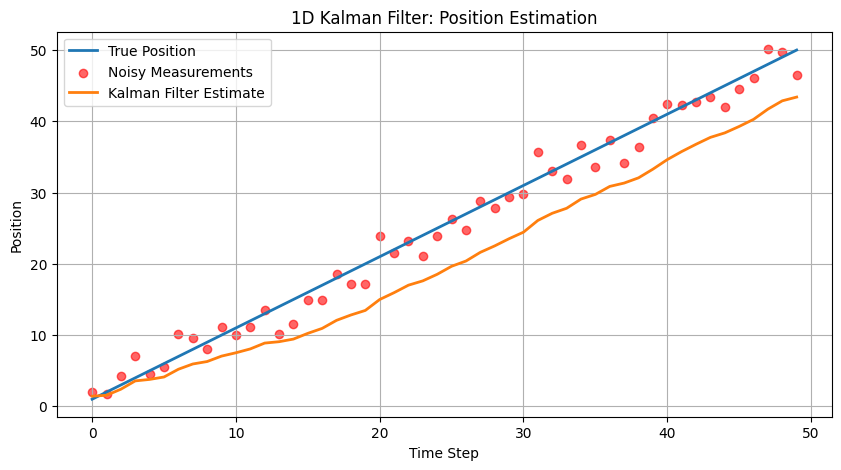

In [54]:
plt.figure(figsize=(10, 5))
plt.plot(true_positions, label="True Position", linewidth=2)
plt.scatter(range(n_steps), measurements, label="Noisy Measurements", color="red", alpha=0.6)
plt.plot(estimates, label="Kalman Filter Estimate", linewidth=2)
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.title("1D Kalman Filter: Position Estimation")
plt.legend()
plt.grid(True)
plt.show()